<a href="https://colab.research.google.com/github/bipu01/Machine_learning/blob/main/Decision_tree_and_random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision tree and Random forest- Machine learning Python

In [2]:
!pip install opendatasets

In [3]:
import opendatasets as od
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns


pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows",150)
matplotlib.rcParams["figure.figsize"] = (10, 6)

#### Downloading the dataset

In [4]:
od.download("https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package")

Dataset URL: https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package


In [5]:
file_path = "./weather-dataset-rattle-package/weatherAUS.csv"

In [6]:
raw_df = pd.read_csv(file_path)
raw_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


Let's check the column type of the dataframe

In [7]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [8]:
raw_df.dropna(subset=["RainTomorrow"], inplace=True)

In [9]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142193 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null   fl

Let's save out work before continuing

#### We separate three sets for **"training"**, **"validation"** and **"testing"**.  

Since the data has date in it, we separate the data based on data and not randomly like we usually do in other data where there is no date

<Axes: xlabel='Date', ylabel='count'>

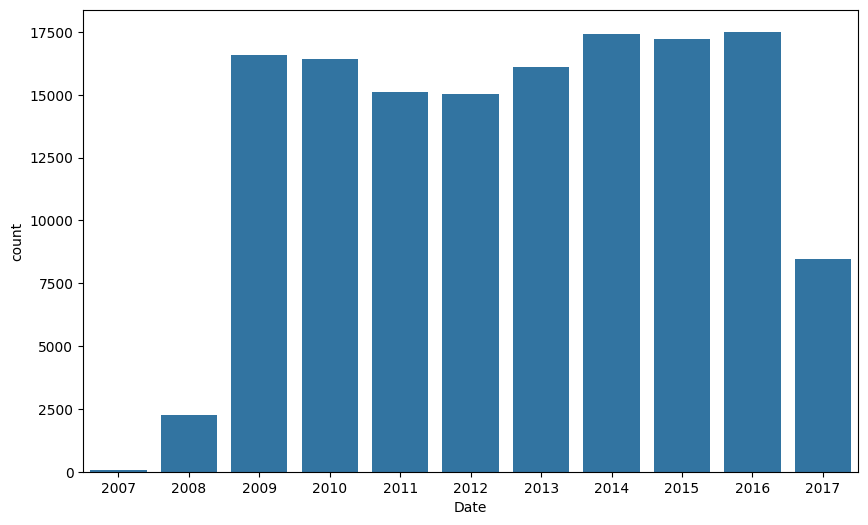

In [10]:
sns.countplot(raw_df, x=pd.to_datetime(raw_df.Date).dt.year)

In [11]:
year = pd.to_datetime(raw_df.Date).dt.year

train_df = raw_df[year < 2015]
val_df = raw_df[year == 2015]
test_df = raw_df[year > 2015]

In [12]:
print(f"Train df :{train_df.shape}")
print(f"val df :{val_df.shape}")
print(f"test df :{test_df.shape}")

Train df :(98988, 23)
val df :(17231, 23)
test df :(25974, 23)


.

#### Identifying the **input** and **target** columns

In [13]:
input_cols = raw_df.columns[1:-1]
target_cols = raw_df.columns[-1]

In [14]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_cols].copy()

val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_cols].copy()

test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_cols].copy()


Let's identify the **numeric** and **categorical data**

In [15]:
numeric_cols = train_inputs.select_dtypes(include = np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes(include = np.object_).columns.tolist()

In [16]:
# categorical_cols

### Imputing missing numeric values

In [17]:
from sklearn.impute import SimpleImputer

In [18]:
imputer = SimpleImputer(strategy="mean").fit(train_inputs[numeric_cols])

**"imputer"** now has the mean for each column to replace the **NaN** value with

In [19]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [20]:
# val_inputs[numeric_cols].isna().sum()

.

### Scaling the data

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
scaler = MinMaxScaler().fit(raw_df[numeric_cols])

In [23]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

.

### Encoding the Categorical data

In [24]:
from sklearn.preprocessing import OneHotEncoder

In [25]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore").fit(raw_df[categorical_cols])

In [26]:
encoded_cols = encoder.get_feature_names_out().tolist()

train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

<ipython-input-26-02a3ef3ee1af>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
<ipython-input-26-02a3ef3ee1af>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
<ipython-input-26-02a3ef3ee1af>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at 

.

In [27]:
x_train = train_inputs[numeric_cols + encoded_cols]
x_val = val_inputs[numeric_cols + encoded_cols]
x_test = test_inputs[numeric_cols + encoded_cols]

## Training and visualizing Desicion Tree

###Training  

We can use `DecisionTreeClassifier` from `sklearn.tree`*italicized text*

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
model = DecisionTreeClassifier(random_state=42)

In [30]:
%%time
model.fit(x_train, train_targets)

CPU times: user 4.92 s, sys: 55 ms, total: 4.98 s
Wall time: 6.56 s


DecisionTreeClassifier(random_state=42)

Now the optimal decision tree for the x_train and train_targets has been made

### Evaluation.

Let's evaluate the decision tree using **accuracy score**

In [31]:
train_preds = model.predict(x_train)
val_preds = model.predict(x_val)
test_preds = model.predict(x_test)

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix

### Prediction on **training data**

In [33]:
train_acuracy = accuracy_score(train_preds, train_targets)
train_prob = model.predict_proba(x_train)
train_acuracy, train_prob

(0.9999797955307714,
 array([[1., 0.],
        [1., 0.],
        [1., 0.],
        ...,
        [1., 0.],
        [1., 0.],
        [1., 0.]]))

### Prediction of **Validation data**

In [34]:
val_accuracy = model.score(x_val, val_targets)
val_prob = model.predict_proba(x_val)

val_accuracy, val_prob

(0.7913644013696245,
 array([[1., 0.],
        [1., 0.],
        [1., 0.],
        ...,
        [1., 0.],
        [0., 1.],
        [1., 0.]]))

Though the 79% accuracy seem impressive, **it is just marginally better than always guessing "no"**.  

It seems like our model has learned the training examples well but **cannot generalize** well to previously unseen examples. This phenomenon is called "**Overfitting**", and reducing overfitting is one of the most important part of any Machine learning project.

In [35]:
val_targets.value_counts()/len(val_targets)

,count
RainTomorrow,
No,0.788289
Yes,0.211711


.

## Tree Visualization

In [36]:
from sklearn.tree import plot_tree, export_text

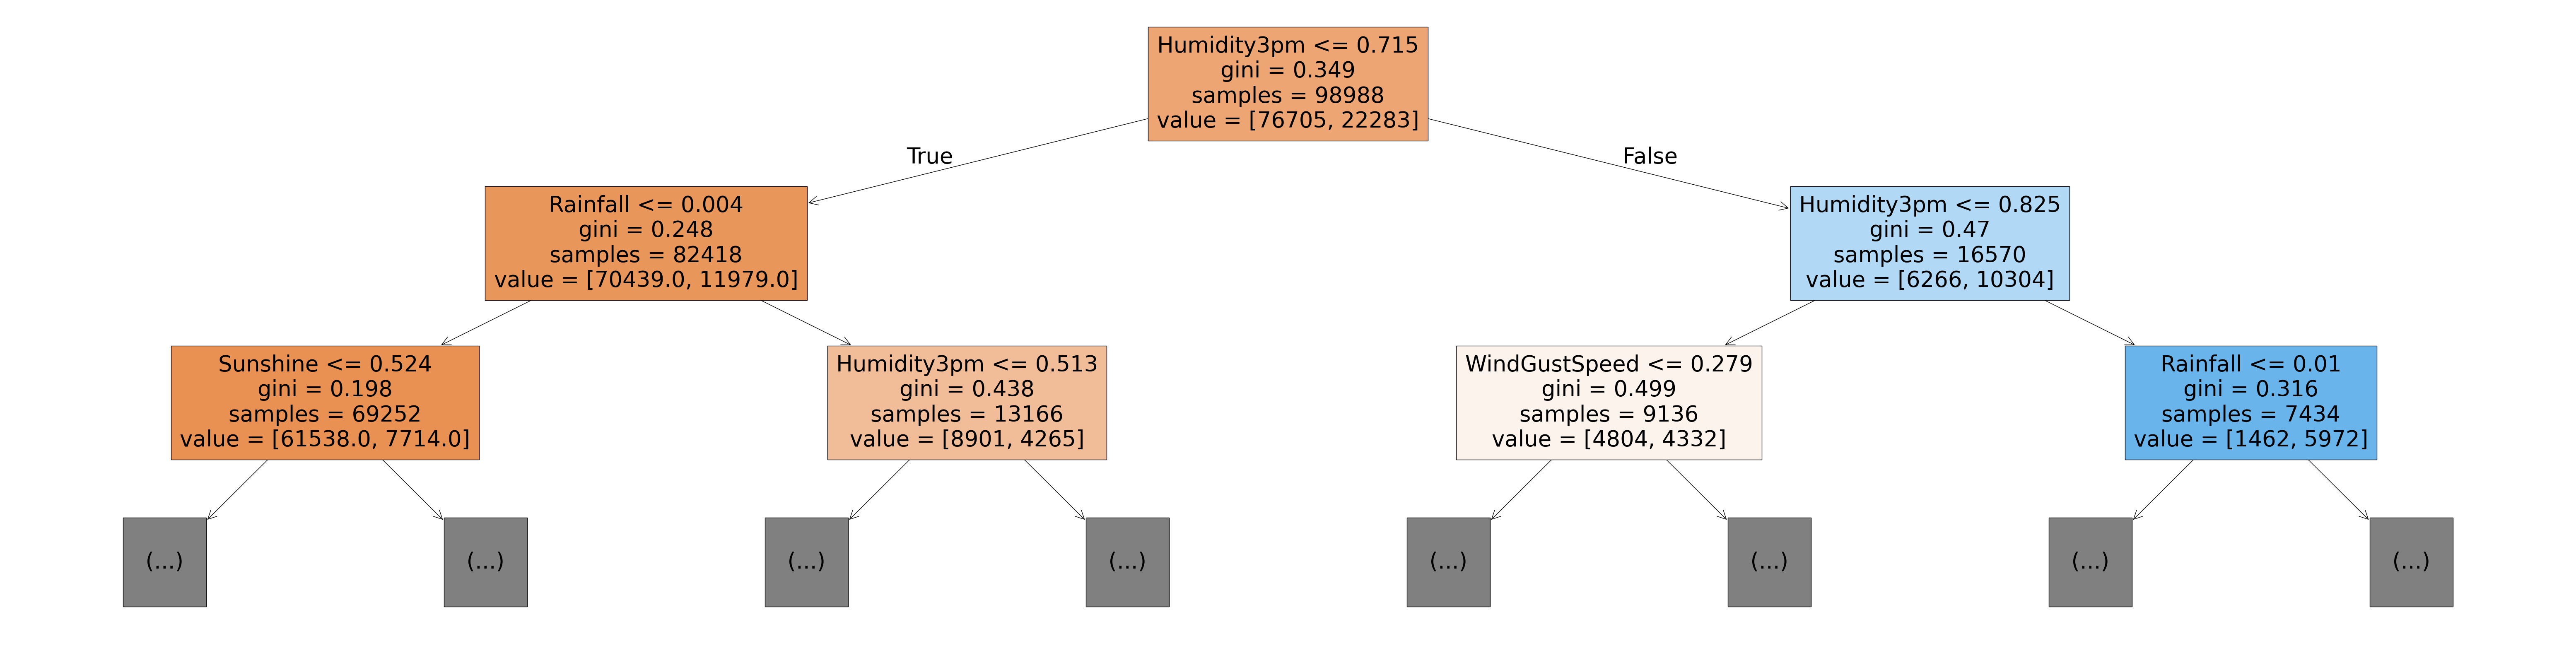

In [37]:
plt.figure(figsize=(80, 20))
plot_tree(model, feature_names=x_train.columns, max_depth=2, filled=True);

In [38]:
model.tree_.max_depth

48

We can also see the tree as text, which can be easier to follow for deeper trees

In [39]:
tree_text = export_text(model, feature_names=x_train.columns, max_depth=10)
print(tree_text[:1000])

|--- Humidity3pm <= 0.72
|   |--- Rainfall <= 0.00
|   |   |--- Sunshine <= 0.52
|   |   |   |--- Pressure3pm <= 0.58
|   |   |   |   |--- WindGustSpeed <= 0.36
|   |   |   |   |   |--- Humidity3pm <= 0.28
|   |   |   |   |   |   |--- WindDir9am_NE <= 0.50
|   |   |   |   |   |   |   |--- Location_Watsonia <= 0.50
|   |   |   |   |   |   |   |   |--- Cloud9am <= 0.83
|   |   |   |   |   |   |   |   |   |--- WindSpeed3pm <= 0.07
|   |   |   |   |   |   |   |   |   |   |--- Pressure3pm <= 0.46
|   |   |   |   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |   |   |   |--- Pressure3pm >  0.46
|   |   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |   |--- WindSpeed3pm >  0.07
|   |   |   |   |   |   |   |   |   |   |--- MinTemp <= 0.32
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- MinTemp >  0.32
|   |   |   |   |   |   |   |   |   |   |   |--- truncated

## Feature Importance.  

Based on the `gini` value, the model has assigned a importance value to each feature. These features can be used to interpret the results given by decision tree.

In [40]:
# model.feature_importances_
feature_importance_df = pd.DataFrame({
    "feature": x_train.columns,
    "importance": model.feature_importances_
}).sort_values("importance",ascending=False)

<Axes: title={'center': 'Feature importance in rain prediction'}, xlabel='importance', ylabel='feature'>

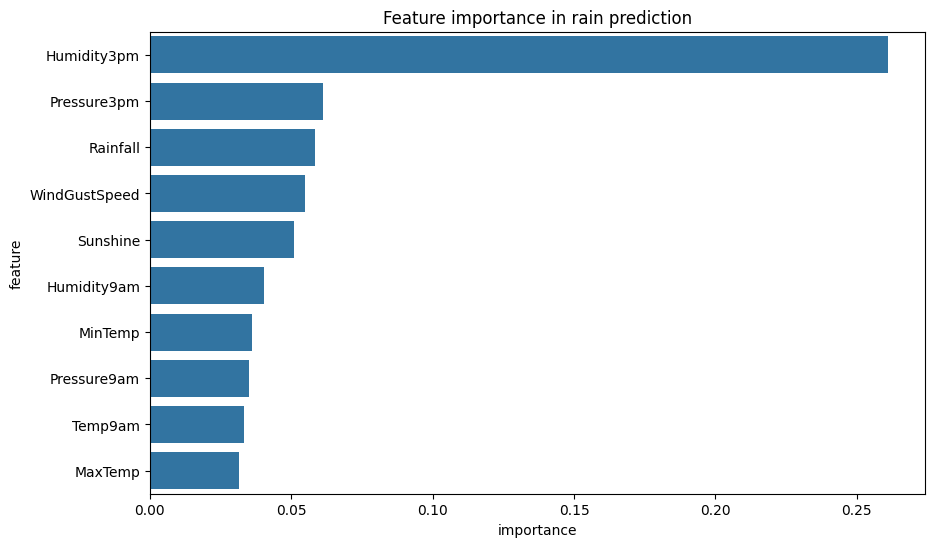

In [41]:
plt.title("Feature importance in rain prediction")
sns.barplot(data=feature_importance_df.head(10), x="importance", y="feature")

# Hyperparameter Tuning and overfitting   

As we saw in our previous model, our decision tree classifier memorized all the decision pattern of our training dataset leading to 100% prediction accuracy.  

But the validation accuracy was marginally better than a dumb model that only predict "no". We try to solve this issue of overfitting. The process of reducing overfitting is called *regularization*.  

The `DecisionTreeClassifier` accepts several arguments, some of which can be modified to reduce overfitting.

In [64]:
#  ?DecisionTreeClassifier

These arguments are called Hyperparameters because these need to be configured manually.  

Here are two we'll discuss:
- max_depth
- max_leaf_nodes

### `max_depth`

By reducing the maximum depth of a decision tree, we can prevent the decision tree from memorizing all the training examples which may lead to better generalizaion

In [43]:
model.tree_.max_depth

48

In [44]:
model = DecisionTreeClassifier(max_depth=7, random_state=42)

model.fit(x_train, train_targets)

DecisionTreeClassifier(max_depth=7, random_state=42)

In [45]:
model.score(x_train, train_targets)

0.8466884874934335

In [46]:
model.score(x_val, val_targets)

0.8453949277465034

Lets visualize the model again using plot_tree

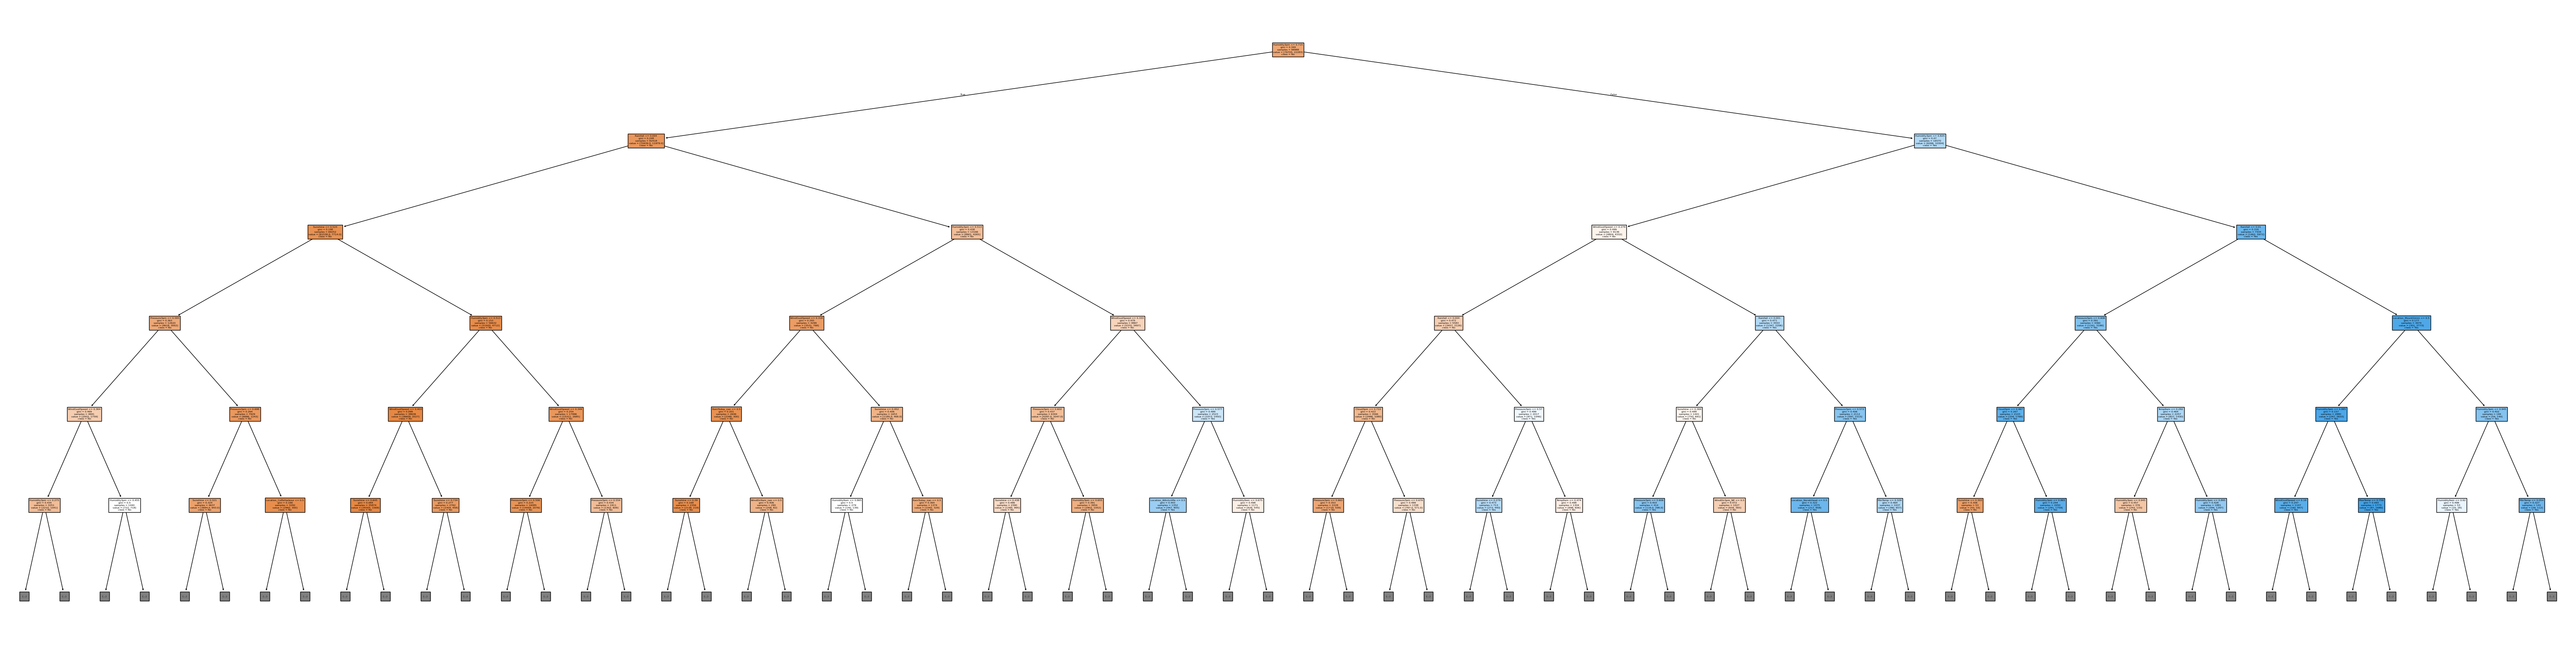

In [47]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names= x_train.columns, filled=True, class_names=model.classes_, max_depth=5);

In [48]:
def max_depth_error(md):
  model = DecisionTreeClassifier(max_depth=md, random_state=42)
  model.fit(x_train, train_targets)
  train_acc = model.score(x_train, train_targets)
  val_acc = model.score(x_val, val_targets)
  # print(f"\033[1mTrain accuracy:\033[0m{train_acc}\n\n\033[1mValidation accuracy:\033[0m{val_acc}")
  return {"Max-Depth": md, "Training error": 1 - train_acc, "Validation error": 1- val_acc}

In [49]:
%%time

# errors_df = pd.DataFrame([max_depth_error(md) for md in range(1, 21)])

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.87 µs


In [52]:
# errors_df

In [62]:
# plt.figure()
# plt.plot(errors_df["Max-Depth"], errors_df["Training error"])
# plt.plot(errors_df["Max-Depth"], errors_df["Validation error"])

### `max_leaf_nodes`.  

Another way to control the size of complexity is limiting the `max_leaf_nodes` in a tree. This allows branches of the tree to have varying lengths.

In [54]:
model = DecisionTreeClassifier(max_leaf_nodes=128, random_state=42)

In [56]:
%%time
model.fit(x_train, train_targets)

CPU times: user 2.16 s, sys: 45.2 ms, total: 2.21 s
Wall time: 2.32 s


DecisionTreeClassifier(max_leaf_nodes=128, random_state=42)

In [59]:
leaf_pred_train = model.score(x_train, train_targets)
leaf_pred_train

0.8480421869317493

In [65]:
leaf_pred_val = model.score(x_val, val_targets)
leaf_pred_val

0.8442342290058615

In [67]:
def max_leaf_error(ml):
  model = DecisionTreeClassifier(max_leaf_nodes=ml, random_state=42)
  model.fit(x_train, train_targets)
  train_acc = model.score(x_train, train_targets)
  val_acc = model.score(x_val, val_targets)
  return {"Max-leaves": ml, "Training error": 1 - train_acc, "Validation error": 1- val_acc}

In [76]:
%%time
leaf_results_df = pd.DataFrame([max_leaf_error(max_leafs) for max_leafs in range(128, 156)])

CPU times: user 51.9 s, sys: 1.67 s, total: 53.6 s
Wall time: 53.7 s


.

From checking the all the max_leaf_nodes in this model, it is found that the **max_leaf_nodes of 129** has provided lowest validation error for our validation set

In [78]:
# leaf_results_df

>**Exercise**: A more advanced technique (But less commonly used technique) for reducing overfitting in decision tree is "**cost-complexity pruning**".


## Training a Random Forest.  

While tuning the hyperparameters of a single decision tree may lead to some improvements, the more effective way to improve the model is to combine the results of several decision trees trained with slightly different parameters. This is called "Random forest model".  

The key idea here is that each decision tree in the forest will make different kinds fo errors, and upon averaging many of the error will cancel out. This idea is also known as "**wisdom of the crowd**"

We will use the `RandomForestClassifier` class from `sklearn.ensemble`

In [80]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
model = RandomForestClassifier(n_jobs=-1, random_state=42)

`n_jobs=-1` allows Random forest to use multiple parallel workers to train decision trees and `random_state=42` ensures that same results in each execution

In [83]:
%%time
model.fit(x_train, train_targets)

CPU times: user 40 s, sys: 544 ms, total: 40.5 s
Wall time: 35.1 s


RandomForestClassifier(n_jobs=-1, random_state=42)

In [84]:
model.score(x_train, train_targets)

0.9999595910615429

In [86]:
model.score(x_val, val_targets)

0.8558992513493123

We can also look into probabilites / confidence of model for a particular outcome (similar to it in other approach of model)

In [87]:
train_prob = model.predict_proba(x_train)
train_prob

array([[0.95, 0.05],
       [0.97, 0.03],
       [1.  , 0.  ],
       ...,
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.95, 0.05]])

We can access and see individual decisions trees from `model.estimators_`

In [93]:
len(model.estimators_)

100

In [92]:
model.estimators_[0]

DecisionTreeClassifier(max_features='sqrt', random_state=1608637542)

.

Just like decision tree, random forest also assign "**importance**" to features by combining the importance values from each trees

In [95]:
importance_df = pd.DataFrame({
    'feature': x_train.columns,
    "importance": model.feature_importances_
}).sort_values("importance", ascending=False)

<Axes: title={'center': 'Feature importance'}, xlabel='importance', ylabel='feature'>

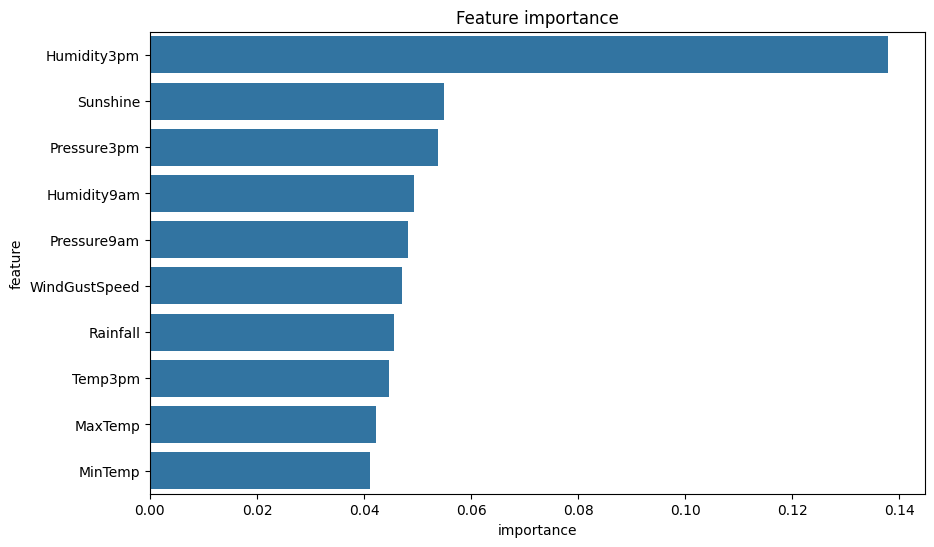

In [98]:
plt.title("Feature importance")
sns.barplot(importance_df.head(10), x="importance", y="feature")

## Hyperparameter Tuning with Random Forests

Let's create a base model with random forest with which we can compare the performance after we tune them with hyperparameters

In [100]:
%%time
base_model = RandomForestClassifier(random_state=42, n_jobs=-1).fit(x_train, train_targets)

CPU times: user 39.7 s, sys: 344 ms, total: 40 s
Wall time: 29.5 s


In [101]:
base_train_acc = base_model.score(x_train, train_targets)
base_val_acc = base_model.score(x_val, val_targets)

In [104]:
base_acc = base_train_acc, base_val_acc
base_acc

(0.9999595910615429, 0.8558992513493123)

We can use `base_acc` as benchmark for our tuning

.

### `n-estimators`.  

This parameter controls the numebr of decision trees in random forest. The default value is `100`. For larger datasets, it is helps to have a greater number of estimators. As a general rule, try to have as less estimators as possible.

#### **10 estimators**

In [105]:
%%time
model = RandomForestClassifier(n_estimators=10, random_state=42, n_jobs=-1).fit(x_train, train_targets)

In [106]:
model.score(x_train, train_targets), model.score(x_val, val_targets)

(0.9873722067321291, 0.843247635076316)

In [107]:
base_acc

(0.9999595910615429, 0.8558992513493123)

#### **500 estimators**

In [108]:
%%time
model = RandomForestClassifier(n_estimators=500, random_state=42, n_jobs=-1).fit(x_train, train_targets)

CPU times: user 3min 12s, sys: 1.95 s, total: 3min 14s
Wall time: 2min 3s


In [109]:
model.score(x_train, train_targets), model.score(x_val, val_targets)

(0.9999797955307714, 0.8571760199640184)

In [110]:
base_acc

(0.9999595910615429, 0.8558992513493123)

#### Findings:  
- we found that increasing the number of estimators from 10 to 500 increases the training and predicting time by a lot.
- The accuracy of random forest with 100 trees and 500 trees is of 0.0013 ie `0.13%` which is negligible in our case.

### `max_depth` and `max_leaf_nodes`   

These values are directly passed to each decision trees and control the maximum depth and number of leaves. By default no limit for depth or leaves are assigned. This is why its training accuracy was 100%.  
You can assign `max_depth` to reduce overfitting.

In [111]:
def test_params(**params):
  model = RandomForestClassifier(random_state=42, n_jobs=-1, **params).fit(x_train, train_targets)
  return model.score(x_train, train_targets), model.score(x_val, val_targets)

.

Let's check few max_depth and max_leaf_nodes

In [126]:
%%time
test_params(max_depth=5)

CPU times: user 9.38 s, sys: 137 ms, total: 9.52 s
Wall time: 5.2 s


(0.8197559300117186, 0.8239800359816609)

In [127]:
%%time
test_params(max_depth=26)

CPU times: user 41 s, sys: 310 ms, total: 41.3 s
Wall time: 28.2 s


(0.9814826039519942, 0.856363530845569)

In [128]:
%%time
test_params(max_depth=16)

CPU times: user 29 s, sys: 200 ms, total: 29.2 s
Wall time: 20.1 s


(0.9067260678061987, 0.8535778538680285)

.

In [129]:
%%time
test_params(max_leaf_nodes=2**5)

CPU times: user 12.3 s, sys: 135 ms, total: 12.4 s
Wall time: 10.7 s


(0.8314038065220026, 0.8335558005919563)

In [130]:
%%time
test_params(max_leaf_nodes=2**10)

CPU times: user 24 s, sys: 158 ms, total: 24.2 s
Wall time: 13.8 s


(0.877995312563139, 0.850792176890488)

In [131]:
%%time
test_params(max_leaf_nodes=2**12)

CPU times: user 32.4 s, sys: 171 ms, total: 32.5 s
Wall time: 19.4 s


(0.9295672202691235, 0.8545064128605421)

In [137]:
%%time
test_params(max_leaf_nodes=2**20 )

CPU times: user 52 s, sys: 13.1 s, total: 1min 5s
Wall time: 40.3 s


(0.9999595910615429, 0.8561313910974406)

.

In [123]:
%%time
test_params(n_estimators=50)

CPU times: user 22.1 s, sys: 157 ms, total: 22.2 s
Wall time: 12.9 s


(0.9995858083808138, 0.8553189019789914)

In [124]:
%%time
test_params(n_estimators=100)

CPU times: user 43.9 s, sys: 433 ms, total: 44.3 s
Wall time: 25.5 s


(0.9999595910615429, 0.8558992513493123)

In [125]:
%%time
test_params(n_estimators=150)

CPU times: user 1min 5s, sys: 688 ms, total: 1min 5s
Wall time: 37.8 s


(0.9999797955307714, 0.8564796007196332)

.

We found out from above testing:  
- best optimal `max_depth` is 16.
- best optimal `max_leaf_nodes` is 2**12
- best optimal `n_estimators` is 50

**Testing the best of best from above's findings**

In [134]:
%%time
test_params(max_depth=16, max_leaf_nodes=2**12, n_estimators=50)

CPU times: user 15.3 s, sys: 131 ms, total: 15.4 s
Wall time: 10.4 s


(0.9064836141754556, 0.8514305611978411)

**Trying other variations**

In [136]:
%%time
test_params(max_depth=16, max_leaf_nodes=2**20 , n_estimators=100)

CPU times: user 32.9 s, sys: 13.3 s, total: 46.3 s
Wall time: 28.7 s


(0.9067159655715844, 0.8521269804422262)

In [ ]:
%%time
test_params(max_depth=16, max_leaf_nodes=2**12, n_estimators=100)